In [1]:
import os
import pandas as pd
from data.visualize import visualize_dataset
import numpy as np

Warning - Certain functionality 
             requires requests_html, which is not installed.
             
             Install using: 
             pip install requests_html
             
             After installation, you may have to restart your Python session.


In [2]:
def get_stock_df(df_all: pd.DataFrame, stock: str) -> pd.DataFrame:
    df = df_all[df_all['stock'] == stock]
    return df

In [24]:
def load_data_file(csv_file):
    if not os.path.exists(csv_file):
        raise FileNotFoundError(
            f"Please run data_fetcher.py to download the data first.")
    else:
        df = pd.read_csv(csv_file)
        df['Date'] = pd.to_datetime(df['Date'])
        df.set_index('Date', inplace=True)
    return df
df_all = load_data_file("data/stock_testing_2023-01-01_2024-12-31.csv")
print(df_all["stock"].unique())

['TSLA' 'AAPL' 'GOOGL' 'AMZN' 'MSFT' 'META' 'NVDA']


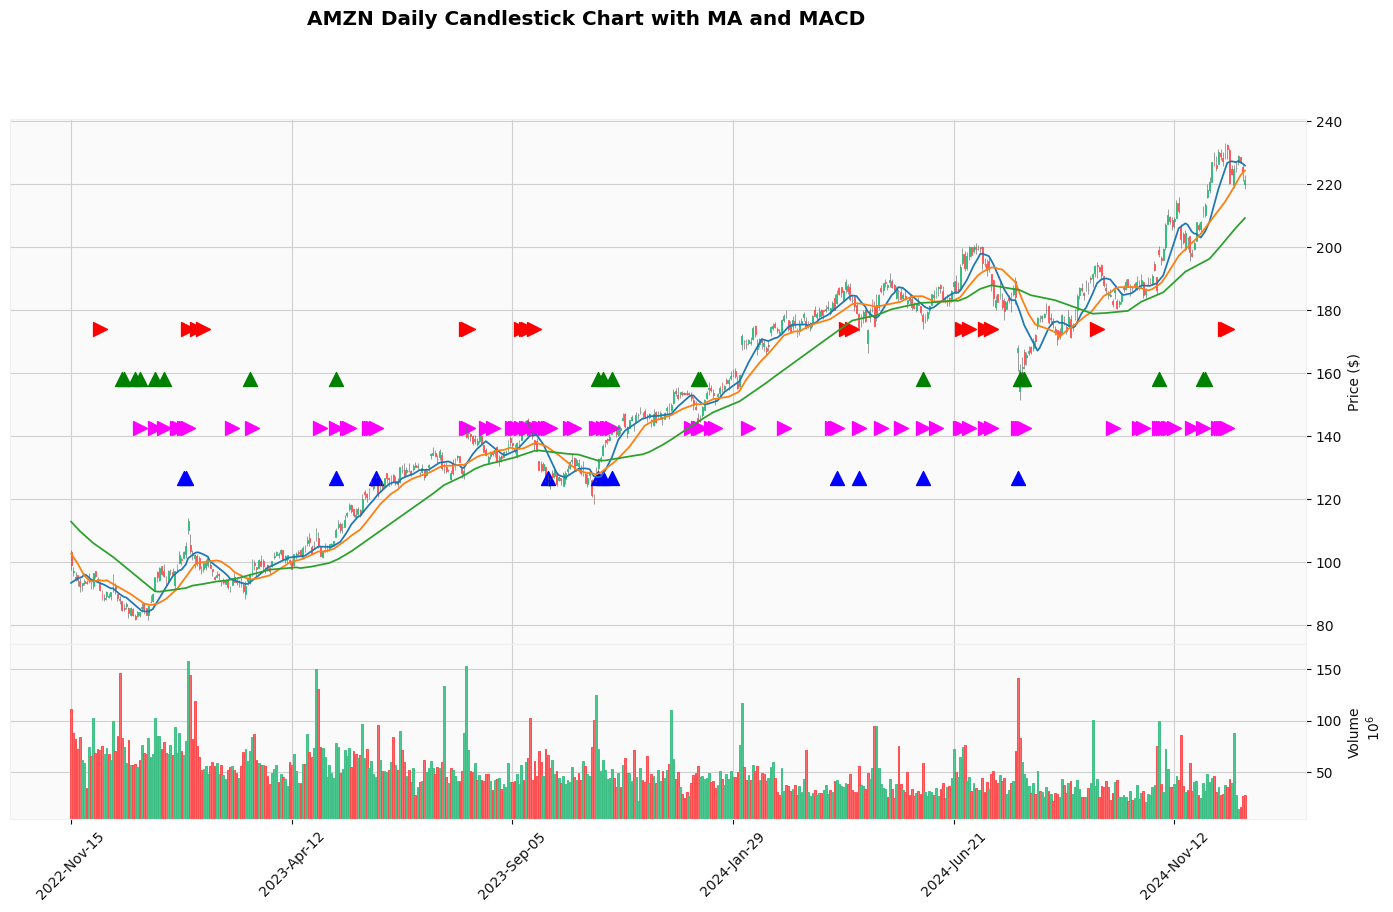

In [25]:
stock = "AMZN"

df_test = get_stock_df(df_all, stock)
visualize_dataset(df_test,
                stock=stock,
                viz_labels=["trend_60days+", "trend_60days-"],
                viz_pred=True,
                plot_macd=False)

In [20]:
df_test.columns[30:80]

Index(['High_diff', 'Low_diff', 'Close_diff', 'Volume_diff', 'MA_5_diff',
       'MA_10_diff', 'MA_20_diff', 'MA_50_diff', 'Trading_Volume_diff',
       'Open_start', 'High_start', 'Low_start', 'Close_start', 'Volume_start',
       'MA_5_start', 'MA_10_start', 'MA_20_start', 'MA_50_start',
       'Trading_Volume_start', 'EPS_Estimate', 'EPS_Reported', 'Surprise(%)',
       'Earnings_Date', 'stock', '10days_max_close', '10days_max_duration',
       '10days_min_close', '10days_min_duration', 'trend_10days+',
       'trend_10days-', '20days_max_close', '20days_max_duration',
       '20days_min_close', '20days_min_duration', 'trend_20days+',
       'trend_20days-', '60days_max_close', '60days_max_duration',
       '60days_min_close', '60days_min_duration', 'trend_60days+',
       'trend_60days-', 'MA_5_20_Crossover_Signal_-1',
       'MA_5_20_Crossover_Signal_0', 'MA_5_20_Crossover_Signal_1',
       'MA_10_50_Crossover_Signal_-1', 'MA_10_50_Crossover_Signal_0',
       'MA_10_50_Crossover_S

In [5]:
from feature.feature import create_batch_feature, feature_names
from data.label import label_columns, label_feature
from data.indicator import add_buy_sell_signals

In [9]:
features, labels, dates = create_batch_feature(df_test)

Positive labels: [23 21 19 17 25 19]


/home/junqiang.zhou/workspaces/venv/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:480: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/home/junqiang.zhou/workspaces/venv/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:481: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


In [79]:
def get_false_predictions(df, label_name, positive=True):
    pred = 1 if positive else 0
    row_indices = df.index[df[label_name+"_pred"] == pred]
    gt_labels = df[label_name].loc[row_indices]   
    
    dates_correct, dates_false = [], []
    for date, gt in gt_labels.items():
        if not np.isnan(gt) and gt == pred:
            dates_correct.append(date.strftime("%Y-%m-%d"))
        if not np.isnan(gt) and gt != pred:
            dates_false.append(date.strftime("%Y-%m-%d"))
    return dates_correct, dates_false
    

dates_tp, dates_fp = get_false_predictions(df_test, "trend_30days+", positive=True)
print("True positives: ")
print(dates_tp)
print("False positives: ")
print(dates_fp)

dates_tn, dates_fn = get_false_predictions(df_test, "trend_30days+", positive=False)
# print("True negatives: ") # Too many negatives
# print(dates_tn)
print("False negatives: ")
print(dates_fn)

True positives: 
['2022-12-30', '2023-01-11', '2023-01-18', '2023-03-15', '2023-05-10', '2023-11-01', '2024-01-04', '2024-01-05', '2024-05-31', '2024-08-02', '2024-08-05', '2024-08-06', '2024-11-01', '2024-12-02', '2024-12-03']
False positives: 
['2023-03-16', '2023-03-24', '2023-04-17', '2023-04-19', '2023-07-19', '2023-09-01', '2023-09-07', '2023-09-22', '2023-09-26', '2023-09-28', '2023-10-13', '2023-11-07', '2024-01-19', '2024-04-03', '2024-04-05', '2024-04-19', '2024-05-06', '2024-06-07', '2024-06-10', '2024-06-13', '2024-09-16', '2024-10-17', '2024-10-21']
False negatives: 
['2023-10-30', '2024-08-07']


In [67]:
df_test.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'MA_5', 'MA_10', 'MA_20', 'MA_50', 'MACD_12_26_9', 'MACDh_12_26_9',
       'MACDs_12_26_9', 'STOCHk_14_3_3', 'STOCHd_14_3_3', 'J', 'RSI_14', 'OBV',
       'VWAP', 'BB_Mid', 'BB_Std', 'BB_Upper', 'BB_Lower', 'ATR', 'Open_diff',
       'High_diff', 'Low_diff', 'Close_diff', 'Volume_diff', 'MA_5_diff',
       'MA_10_diff', 'MA_20_diff', 'MA_50_diff', 'Open_start', 'High_start',
       'Low_start', 'Close_start', 'Volume_start', 'MA_5_start', 'MA_10_start',
       'MA_20_start', 'MA_50_start', 'EPS_Estimate', 'EPS_Reported',
       'Surprise(%)', 'Earnings_Date', 'stock', '10days_max_close',
       '10days_max_duration', '10days_min_close', '10days_min_duration',
       'trend_10days+', 'trend_10days-', '20days_max_close',
       '20days_max_duration', '20days_min_close', '20days_min_duration',
       'trend_20days+', 'trend_20days-', '30days_max_close',
       '30days_max_duration', '30days_min_close', '3

In [80]:
columns = df_test.columns
# columns = [column for column in columns if "trend" in column or column in feature_names[18:]]
display(df_test.loc[['2023-03-15', '2023-03-24'], ["30days_max_close", "30days_min_close"]])
display(df_test.loc[['2023-03-15', '2023-03-24'], [column for column in columns if "trend" in column]])
display(df_test.loc[['2023-03-15', '2023-03-24'], [column for column in columns if column in feature_names[18:]]])

,30days_max_close,30days_min_close
Date,,
2023-03-15,0.111850,0.010811
2023-03-24,0.089983,-0.009070


,trend_10days+,trend_10days-,trend_20days+,trend_20days-,trend_30days+,trend_30days-,trend_10days+_pred,trend_10days-_pred,trend_20days+_pred,trend_20days-_pred,trend_30days+_pred,trend_30days-_pred,trend_10days+_prob,trend_10days-_prob,trend_20days+_prob,trend_20days-_prob,trend_30days+_prob,trend_30days-_prob
Date,,,,,,,,,,,,,,,,,,
2023-03-15,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.595323,0.448537,0.558518,0.423968,0.684183,0.548993
2023-03-24,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.608527,0.446462,0.563953,0.415573,0.679375,0.530468


,MA_10_50_Crossover_Signal_-1,MA_10_50_Crossover_Signal_0,MA_10_50_Crossover_Signal_1,MA_5_20_Crossover_Signal_-1,MA_5_20_Crossover_Signal_0,MA_5_20_Crossover_Signal_1,MACD_Crossover_Signal_-1,MACD_Crossover_Signal_0,MACD_Crossover_Signal_1,RSI_Over_Bought_Signal_-1,RSI_Over_Bought_Signal_0,RSI_Over_Bought_Signal_1,BB_Signal_-1,BB_Signal_0,BB_Signal_1
Date,,,,,,,,,,,,,,,
2023-03-15,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0
2023-03-24,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0


In [ ]:
column_30days = ['30days_max_close','30days_max_duration', '30days_min_close', '30days_min_duration','trend_30days+', 'trend_30days-']
df_test.loc[(df_test['trend_30days+'] == 1) | (df_test['trend_30days-'] == 1), column_30days + buy_sell_signals_encoded]